# Linear Regression

Author: Richard H. CHEN

## 0. 导入相关模块

In [63]:
import numpy as np
import matplotlib.pyplot as plt

## 1. 随机生成数据

In [64]:
# 指示随机数的个数，设置为 50
# 并随机生成 50 个范围为 0~10 的随机浮点数数组，存放到变量 x 中
point_num=50
x=np.random.rand(point_num)*10
print(x) # 查看结果

[3.59193279 9.28938588 9.3484353  8.83374227 7.09640348 1.86029383
 3.90226863 8.89961118 5.10869198 6.07143768 3.92306337 3.76761623
 1.29215622 6.93643486 0.85962735 5.56780391 9.90896263 7.01337955
 8.07187877 0.60314651 9.45925002 2.81041865 2.79254924 9.1445743
 7.1969321  5.2883793  5.37797195 8.86588629 5.00463269 3.92433008
 6.81122879 4.13083656 9.13508551 3.60795028 8.88961443 0.46071248
 9.23340076 6.81136491 5.93686539 4.03967972 0.98643525 3.1956812
 2.17410507 0.4107273  3.26594007 9.28210924 6.17488999 3.36281147
 3.77914252 7.49352975]


In [65]:
# 生成 y
y_real=x+np.sin(x)+np.log(x+0.1)-5
# 为 y 添加正态随机偏移量（符合正态分布的偏移量）
y=y_real+np.random.normal(0.0,2.0,point_num)
print(y) # 查看结果

[ 1.33141918  4.45928992  6.30069416  4.6940617   1.67470067 -1.7483977
 -1.03627122  6.66057223 -1.14081696  3.53402726  1.29299098 -2.18397568
 -1.21158629  6.2225283  -0.61723513  3.2022752   6.10667826  1.84495822
  6.95788256 -4.15331475  7.97265715  1.28327454 -1.4031123   8.10250506
  5.57359281 -0.04610469  2.3687752   4.29851244 -0.90115238  2.51389759
  5.53456476  0.80870281  6.16752525 -0.79263451  9.10588868 -6.26822963
  9.55431633  1.48869399  9.21175402 -0.41065023 -1.32882334  1.98991907
  0.37507045 -5.26342085 -1.30453605  4.5910229   2.90600082 -1.11249695
 -3.44229308  4.83073107]


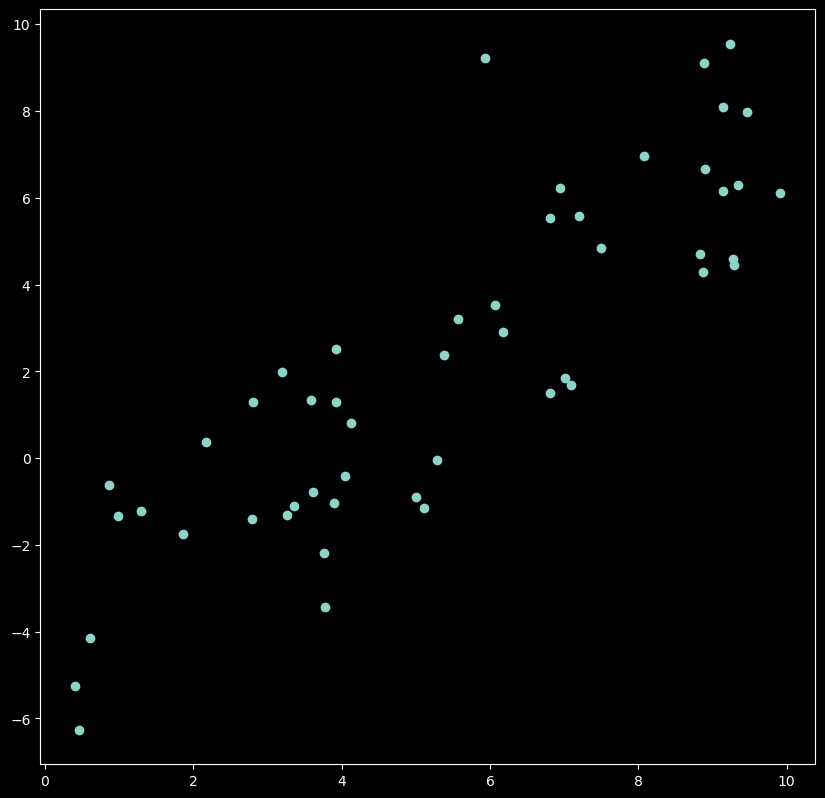

In [66]:
# 绘制散点图
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(x, y)
plt.show()

## 2. 最小二乘法

In [67]:
# 输入：自变量X，因变量Y的测量值
# 返回：多项式系数W
def least_square(X,Y):
    '''
    输入：自变量X，因变量Y的测量值
    返回：多项式系数W
    '''
    Xt=np.transpose(X)
    X1=np.matmul(Xt,X)
    X1in=np.linalg.inv(X1)
    W1=np.matmul(X1in,Xt)
    W=np.matmul(W1,Y)
    return W

## 3. 一元一次线性回归

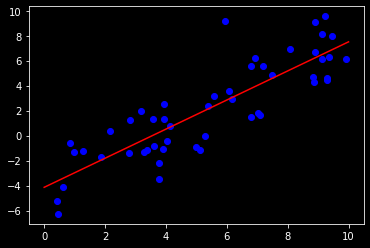

In [68]:
e=np.ones(len(x))
A=np.hstack((x.reshape(-1,1),e.reshape(-1,1))) # 把A转化为矩阵
W=least_square(A,y)
# 绘图
plt.scatter(x,y,color="blue",label="data")
xL=np.linspace(0,10,100) # 在0-10之间取100个点
yL=W[0]*xL+W[1]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a*x+b")


## 4. 一元二次线性回归

[ 1.43771081e-03  1.14922550e+00 -4.11057397e+00]


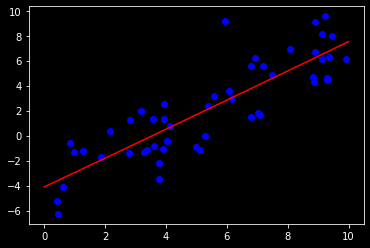

In [69]:
x2 = x**2
e = np.ones(len(x))
A = np.hstack((x2.reshape(-1, 1), x.reshape(-1, 1),
               e.reshape(-1, 1)))  # 把A转化为矩阵[x**2,x,1]
W = least_square(A, y)
# 绘图
plt.scatter(x, y, color="blue", label="data")
xL = np.linspace(0, 10, 50)  # 在0-10之间取100个点
yL = W[0]*(xL**2)+W[1]*xL+W[2]
plt.plot(xL, yL, color="red", label="Fitted Line: y=a1*x^2+a0*x+b")
print(W)


## 5. 一元三次线性回归

[-1.74694772e-03  2.78630124e-02  1.04231567e+00 -4.01628926e+00]


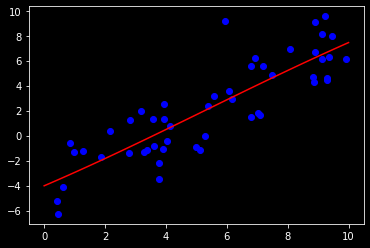

In [70]:
x3=x**3
e=np.ones(len(x))
A=np.hstack((x3.reshape(-1,1),x2.reshape(-1,1),x.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y)
# 绘图
plt.scatter(x,y,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**3)+W[1]*(xL**2)+W[2]*xL+W[3]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a2*x^3+a1*x^2+a0*x+b")
print(W)

## 6. 一元四次线性回归

[-0.01573569  0.31822858 -2.09032404  6.00962256 -6.73661398]


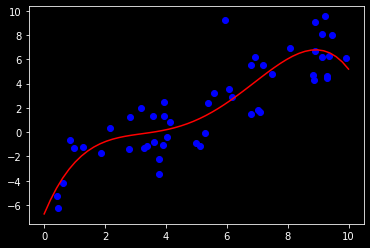

In [71]:
x4=x**4
e=np.ones(len(x))
A=np.hstack((x4.reshape(-1,1),x3.reshape(-1,1),x2.reshape(-1,1),x.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y)
# 绘图
plt.scatter(x,y,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**4)+W[1]*(xL**3)+W[2]*(xL**2)+W[3]*xL+W[4]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a3*x^4+a2*x^3+a1*x^2+a0*x+b")
print(W)

## 7. 一元五次线性回归

[ 4.22980160e-03 -1.24931657e-01  1.34081184e+00 -6.27041763e+00
  1.29426367e+01 -9.75954231e+00]


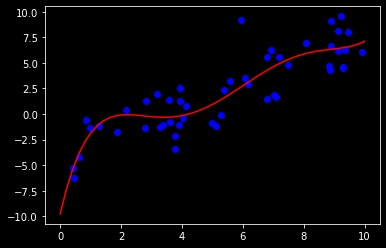

In [72]:
x5=x**5
e=np.ones(len(x))
A=np.hstack((x5.reshape(-1,1),x4.reshape(-1,1),x3.reshape(-1,1),x2.reshape(-1,1),x.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y)
# 绘图
plt.scatter(x,y,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**5)+W[1]*(xL**4)+W[2]*(xL**3)+W[3]*(xL**2)+W[4]*xL+W[5]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a4*x^5+a3*x^4+a2*x^3+a1*x^2+a0*x+b")
print(W)

## 8. 减少样本规模
把上面制作随机数据时的样本点数量减少到10 ，重新执行上述步骤，观察样本规模的减少带来的过拟合现象。

[3.59193279 1.86029383 3.92306337 5.56780391 9.45925002 5.2883793
 6.81122879 0.46071248 0.98643525 9.28210924]
[ 1.33141918 -1.7483977   1.29299098  3.2022752   7.97265715 -0.04610469
  5.53456476 -6.26822963 -1.32882334  4.5910229 ]


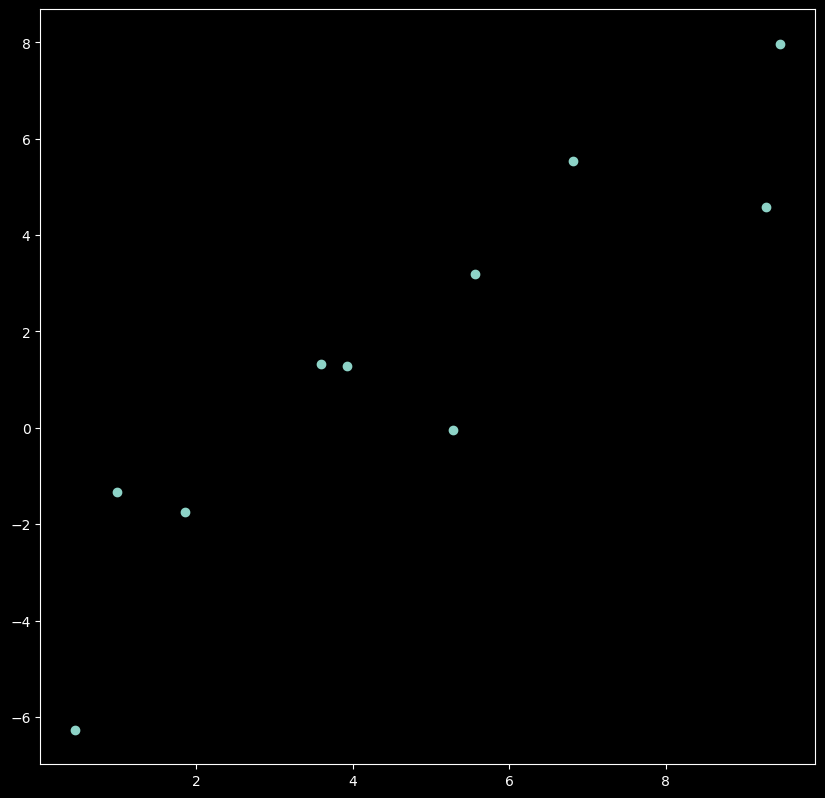

In [73]:
# 对x与y每隔5个抽取一个数据
x1=x[0:point_num:5]
print(x1)
y1=y[0:point_num:5]
print(y1)

# 画散点图
plt.figure(figsize=(10, 10), dpi=100)
plt.scatter(x1, y1)
plt.show()

### 8.1 一元一次线性回归

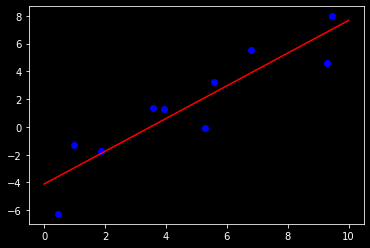

In [74]:
e=np.ones(len(x1))
A=np.hstack((x1.reshape(-1,1),e.reshape(-1,1))) # 把A转化为矩阵
W=least_square(A,y1)
# 绘图
plt.scatter(x1,y1,color="blue",label="data")
xL=np.linspace(0,10,100) # 在0-10之间取100个点
yL=W[0]*xL+W[1]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a*x+b")

### 8.2 一元二次线性回归

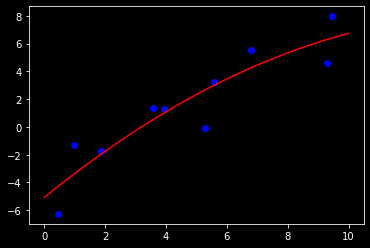

In [75]:
x12=x1**2
e=np.ones(len(x1))
A=np.hstack((x12.reshape(-1,1),x1.reshape(-1,1),e.reshape(-1,1))) # 把A转化为矩阵
W=least_square(A,y1)
# 绘图
plt.scatter(x1,y1,color="blue",label="data")
xL=np.linspace(0,10,100) # 在0-10之间取100个点
yL=W[0]*(xL**2)+W[1]*xL+W[2]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a1*x^2+a0*x+b")

### 8.3 一元三次线性回归

[ 0.02407304 -0.42227962  3.1958775  -6.15429001]


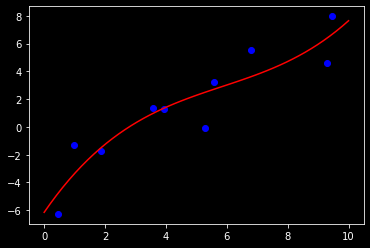

In [76]:
x13=x1**3
e=np.ones(len(x1))
A=np.hstack((x13.reshape(-1,1),x12.reshape(-1,1),x1.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y1)
# 绘图
plt.scatter(x1,y1,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**3)+W[1]*(xL**2)+W[2]*xL+W[3]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a2*x^3+a1*x^2+a0*x+b")
print(W)

### 8.4 一元四次线性回归

[-0.02164745  0.44156449 -2.99940849  8.79855234 -9.04264405]


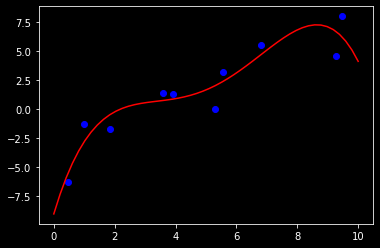

In [77]:
x14=x1**4
e=np.ones(len(x1))
A=np.hstack((x14.reshape(-1,1),x13.reshape(-1,1),x12.reshape(-1,1),x1.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y1)
# 绘图
plt.scatter(x1,y1,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**4)+W[1]*(xL**3)+W[2]*(xL**2)+W[3]*xL+W[4]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a3*x^4+a2*x^3+a1*x^2+a0*x+b")
print(W)

### 8.5 一元五次线性回归

[ 6.09418763e-03 -1.62794071e-01  1.60022859e+00 -7.05283782e+00
  1.44162788e+01 -1.12013923e+01]


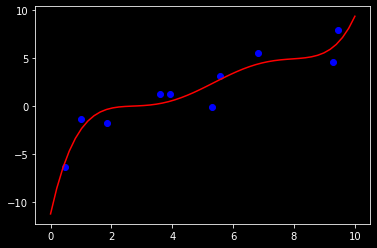

In [78]:
x15=x1**5
e=np.ones(len(x1))
A=np.hstack((x15.reshape(-1,1),x14.reshape(-1,1),x13.reshape(-1,1),x12.reshape(-1,1),x1.reshape(-1,1),e.reshape(-1,1)))
W=least_square(A,y1)
# 绘图
plt.scatter(x1,y1,color="blue",label="data")
xL=np.linspace(0,10,50) # 在0-10之间取100个点
yL=W[0]*(xL**5)+W[1]*(xL**4)+W[2]*(xL**3)+W[3]*(xL**2)+W[4]*xL+W[5]
plt.plot(xL,yL,color="red",label="Fitted Line: y=a4*x^5+a3*x^4+a2*x^3+a1*x^2+a0*x+b")
print(W)